##**Análisis de imágenes**##


###Instrucciones:

El notebook se puede ejecutar linealmente, sin embargo el preprocesamiento de las imágenes es pesado, por ende, tarda unas horas en ejecutarse. Se hace esta iteración con un subset de 21.363 registros.

Se dejan los archivos utilizados en la carpeta del drive llamada DATASET/Imagenes_Org o se pueden consultar en el siguiente link de la competencia de Kaggle: https://www.kaggle.com/c/petfinder-adoption-prediction/data

##**Importe de librerías**##

In [ ]:
#Importando librerías
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import keras
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D
from keras.utils import np_utils
from PIL import Image  
import os, os.path
import PIL.Image as Image
import cv2
import time
from sklearn.model_selection import train_test_split

##**Lectura de los archivos**##

In [ ]:
#Importando el drive al colab
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#Importando el dataset de la carpeta del drive
!ls '/content/gdrive/My Drive/MONOGRAFIA/DATASET/Imagenes_Org'

'Clase 0'  'Clase 1'  'Clase 2'  'Clase 3'  'Clase 4'


##**Preprocesamiento de las imágenes**##

In [ ]:
#Preprocesamiento y lectura de 21.363 imágenes
ti = time.time()
train_path = '/content/gdrive/My Drive/MONOGRAFIA/DATASET/Imagenes_Org'
contenido = os.listdir(train_path)

data = []
y_total=[]

for clase in contenido:
    train_path_1 = '/content/gdrive/My Drive/MONOGRAFIA/DATASET/Imagenes_Org/' + clase
    contenido_1 = os.listdir(train_path_1)
    cuenta = 0
    for image_id in contenido_1: 
      cuenta += 1
      if cuenta <= 5000:
        image = cv2.imread('/content/gdrive/My Drive/MONOGRAFIA/DATASET/Imagenes_Org/'+ f"{clase}/{image_id}")

        resultado = cv2.resize(image, dsize=(128,128), interpolation=cv2.INTER_CUBIC)

        new_images = Image.fromarray(resultado.astype(np.uint8))

        
        if clase == 'Clase 0':
          y = [1,0,0,0,0]
        elif clase == 'Clase 1':
          y = [0,1,0,0,0]
        elif clase == 'Clase 2':
          y = [0,0,1,0,0]
        elif clase == 'Clase 3':
          y = [0,0,0,1,0]
        elif clase == 'Clase 4':
          y = [0,0,0,0,1]
        y_total.append(y)
        

        data.append(resultado)
        #print(cuenta)
   
      else:
        break

print('tiempo: ', time.time()-ti)

tiempo:  3693.172671318054


In [ ]:
#Tamaño de las imágenes y formato
print (new_images.size, new_images.mode, new_images.format)

(128, 128) RGB None


In [ ]:
#Tipo de dato de las imágenes
type(new_images)

PIL.Image.Image

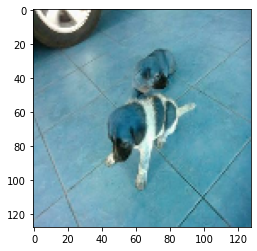

In [ ]:
#Imagen 2200 de la data de imágenes
plt.imshow(data[2200]);

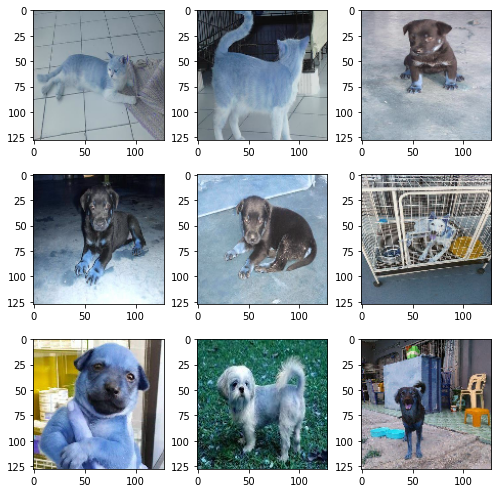

In [ ]:
#Muestra de 9 imágenes preprocesadas
plt.rcParams['figure.figsize'] = (7,7) 

for i in range(9):
    plt.subplot(3,3,i+1) 
    plt.imshow(data[i],)
    #plt.title("Class %d"%y_train[i])
    
plt.tight_layout()

##**Modelo de Deep Learning**##

In [ ]:
#Parámetros de la data para el modelo
num_classes = 5
input_shape = (128, 128, 3)

#Partiendo los datos en entrenamiento y test
x_train, x_test = train_test_split(np.asarray(data), test_size = 0.2)
y_train, y_test = train_test_split(np.asarray(y_total), test_size = 0.2)

In [ ]:
#Tipo de dato de la variable de entrenamiento
type(x_train)

numpy.ndarray

In [ ]:
#Escala de imágenes 
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [ ]:
#Dimensiones de la data de entrenamiento y test
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (17089, 128, 128, 3)
x_test shape: (4273, 128, 128, 3)
17089 train samples
4273 test samples


In [ ]:
#Tamaño de la variable objetivo
len(y_total)

21362

In [ ]:
#Arquitectura del modelo
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(2, 2), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 61504)             0         
_________________________________________________________________
dropout (Dropout)            (None, 61504)             0         
_________________________________________________________________
dense (Dense)                (None, 5)                 3

In [ ]:
#Configurando el proceso de aprendizaje de red
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
#Entrenamiento del modelo
batch_size = 500
epochs = 25

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/25
31/31 [==============================] - 45s 422ms/step - loss: 1.6085 - accuracy: 0.2358 - val_loss: 1.5392 - val_accuracy: 0.2341
Epoch 2/25
31/31 [==============================] - 10s 330ms/step - loss: 1.5370 - accuracy: 0.2447 - val_loss: 1.5395 - val_accuracy: 0.2288
Epoch 3/25
31/31 [==============================] - 10s 333ms/step - loss: 1.5256 - accuracy: 0.2835 - val_loss: 1.5447 - val_accuracy: 0.2229
Epoch 4/25
31/31 [==============================] - 10s 333ms/step - loss: 1.4949 - accuracy: 0.3225 - val_loss: 1.5511 - val_accuracy: 0.2358
Epoch 5/25
31/31 [==============================] - 10s 334ms/step - loss: 1.4475 - accuracy: 0.3594 - val_loss: 1.5806 - val_accuracy: 0.2382
Epoch 6/25
31/31 [==============================] - 10s 335ms/step - loss: 1.3962 - accuracy: 0.3905 - val_loss: 1.6116 - val_accuracy: 0.2370
Epoch 7/25
31/31 [==============================] - 10s 335ms/step - loss: 1.3423 - accuracy: 0.4234 - val_loss: 1.6469 - val_accuracy: 0.2288

In [ ]:
#Pérdida y predicción del modelo
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 2.3953731060028076
Test accuracy: 0.2199859619140625


In [ ]:
#Testeando las predicciones del modelo
predicciones = model.predict(x_test)
predicciones

array([[1.4208174e-02, 5.0485849e-01, 9.0977840e-02, 2.1104598e-01,
        1.7890947e-01],
       [7.7522889e-04, 1.6051838e-02, 9.2363894e-01, 4.2615641e-02,
        1.6918307e-02],
       [1.5263886e-03, 1.1235832e-02, 6.1145159e-03, 3.2513413e-01,
        6.5598911e-01],
       ...,
       [2.9680165e-04, 1.5321930e-02, 4.4894174e-01, 3.5957094e-02,
        4.9948245e-01],
       [9.9280709e-04, 4.1240565e-02, 7.1122356e-02, 7.5999635e-01,
        1.2664790e-01],
       [3.0079149e-04, 1.0124963e-01, 1.8778026e-01, 6.4421016e-01,
        6.6459157e-02]], dtype=float32)

In [ ]:
#Predicciones del modelo con la imagen 4000
print(predicciones[4000])
y_test[4000]

[0.00095135 0.05775023 0.53350544 0.37262154 0.03517138]


array([0, 1, 0, 0, 0])

In [ ]:
#Indice máximo de la predicción
np.argmax(predicciones[4000])

2